In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def rgb_to_hsl(rgb):
    """
    Convert image data in RGB format (H, W, 3) to HSL
    """
    assert rgb.shape[2] == 3
    rgb_f = rgb.reshape(-1, 3)
    cmax = np.max(rgb_f, axis=1)
    cmin = np.min(rgb_f, axis=1)
    crg = np.ptp(rgb_f, axis=1)
    c_amax = np.where(crg > 0, np.argmax(rgb_f, axis=1), -1)

    hsl = np.zeros_like(rgb_f)
    # Hue
    hsl[c_amax == -1, 0] = 0.
    hsl[filt, 0] = np.mod((rgb_f[(filt:=c_amax == 0), 1] - rgb_f[filt, 2]) / crg[filt], 6) * 60
    hsl[filt, 0] = (((rgb_f[(filt:=c_amax == 1), 2] - rgb_f[filt, 0]) / crg[filt]) + 2) * 60
    hsl[filt, 0] = (((rgb_f[(filt:=c_amax == 2), 0] - rgb_f[filt, 1]) / crg[filt]) + 4) * 60
    # Lightness
    hsl[:, 2] = (cmin + cmax) / 2
    # Saturation
    hsl[c_amax == -1, 1] = 0.
    hsl[filt, 1] = crg[(filt:=c_amax >= 0)] / (1 - np.abs(cmin[filt] + cmax[filt] - 1))
    hsl[:, 1] = np.maximum(np.minimum(hsl[:, 1], 1), 0)

    return hsl.reshape(rgb.shape)

    
def hsl_to_rgb(hsl):
    """
    Convert image data in HSL format (H, W, 3) to RGB
    """
    hsl_f = hsl.reshape(-1, 3)

    c = (1 - np.abs(2 * hsl_f[:, 2] - 1)) * hsl_f[:, 1]
    x = c * (1 - np.abs(np.mod(hsl_f[:, 0] / 60, 2) - 1))
    m = hsl_f[:, 2] - (c / 2)
    rgb = np.zeros_like(hsl_f)
    rgb[filt] = np.column_stack((c, x, np.zeros_like(c)))[filt:=(hsl_f[:, 0] / 60).astype(int) == 0]
    rgb[filt] = np.column_stack((x, c, np.zeros_like(c)))[filt:=(hsl_f[:, 0] / 60).astype(int) == 1]
    rgb[filt] = np.column_stack((np.zeros_like(c), c, x))[filt:=(hsl_f[:, 0] / 60).astype(int) == 2]
    rgb[filt] = np.column_stack((np.zeros_like(c), x, c))[filt:=(hsl_f[:, 0] / 60).astype(int) == 3]
    rgb[filt] = np.column_stack((x, np.zeros_like(c), c))[filt:=(hsl_f[:, 0] / 60).astype(int) == 4]
    rgb[filt] = np.column_stack((c, np.zeros_like(c), x))[filt:=(hsl_f[:, 0] / 60).astype(int) == 5]
    rgb = np.maximum(np.minimum(rgb + np.expand_dims(m, 1), 1), 0)

    return rgb.reshape(hsl.shape)

(395, 1584, 3)


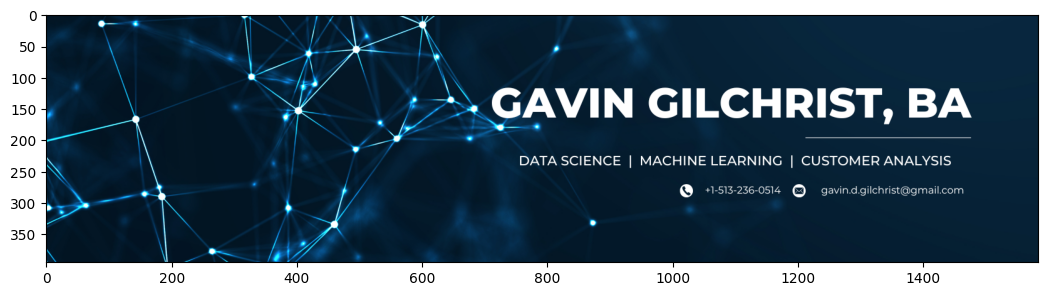

In [2]:
# Get image
img = mpimg.imread('data/linkedin_profile_banner.png')
img = img[1:, :, :3]
# img = np.round(img * 255).astype(int)
print(img.shape)
plt.figure(figsize=(12.8, 9.6))
plt.imshow(img)

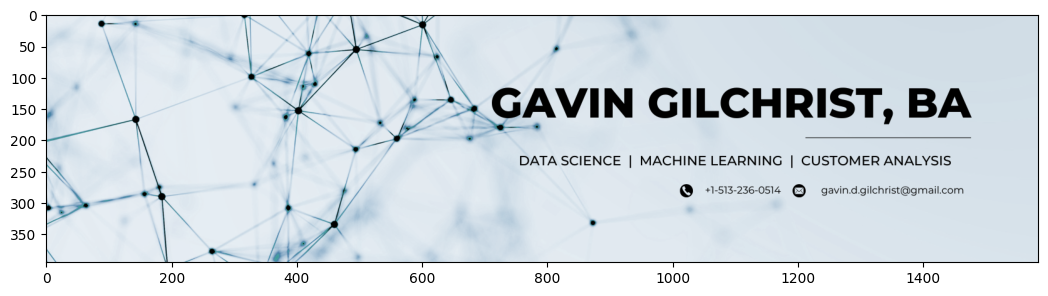

In [3]:
# Convert to HSL
img_hsl = rgb_to_hsl(img)

# Adjust color
# img_hsl[:, :, 0] = np.mod(img_hsl[:, :, 0] + 130, 360)

# Adjust saturation
img_hsl[:, :, 1] *= 0.4

# Reverse lightness
img_hsl[:, :, 2] = 1 - img_hsl[:, :, 2]

# Convert back to RGB
img_new = hsl_to_rgb(img_hsl)

# See, see, see
plt.figure(figsize=(12.8, 9.6))
plt.imshow(img_new)

In [439]:
mpimg.imsave('data/linkedin_profile_banner_new.png', img_new)